<a href="https://colab.research.google.com/github/Dav-web/Transformer/blob/main/AE_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
root_path = '/content/gdrive/My Drive/vaccination_all_tweets.csv'

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.cluster import k_means
import re
import numpy as np 
import pandas as pd
import pandas as pd
import numpy as np
import sys
import json
import re
import copy
import math
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob 
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

In [ ]:
df = pd.read_csv(root_path)
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [ ]:
df.shape

(164375, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164375 entries, 0 to 164374
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                164375 non-null  int64 
 1   user_name         164374 non-null  object
 2   user_location     111788 non-null  object
 3   user_description  152964 non-null  object
 4   user_created      164375 non-null  object
 5   user_followers    164375 non-null  int64 
 6   user_friends      164375 non-null  int64 
 7   user_favourites   164375 non-null  int64 
 8   user_verified     164375 non-null  bool  
 9   date              164375 non-null  object
 10  text              164375 non-null  object
 11  hashtags          132424 non-null  object
 12  source            164256 non-null  object
 13  retweets          164375 non-null  int64 
 14  favorites         164375 non-null  int64 
 15  is_retweet        164375 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory

In [ ]:
df.describe()

,id,user_followers,user_friends,user_favourites,retweets,favorites
count,1.643750e+05,1.643750e+05,164375.000000,1.643750e+05,164375.000000,164375.000000
mean,1.393681e+18,9.998779e+04,1004.114811,1.229410e+04,2.595863,11.421195
std,2.094133e+16,8.476263e+05,5108.501990,3.962694e+04,49.201223,174.476462
min,1.337728e+18,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,1.376823e+18,8.700000e+01,37.000000,5.800000e+01,0.000000,0.000000
50%,1.397260e+18,4.290000e+02,249.000000,1.106000e+03,0.000000,0.000000
75%,1.410230e+18,1.683000e+03,827.000000,7.592000e+03,1.000000,2.000000
max,1.425723e+18,1.598809e+07,516578.000000,1.221784e+06,11288.000000,25724.000000


In [ ]:
dff = df.drop_duplicates(subset=['text'], keep=False, inplace=False)
print(dff.shape)

(161315, 16)


In [ ]:
import pandas as pd
import re
!pip install emoji
import emoji
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())

     |████████████████████████████████| 170 kB 5.2 MB/s 
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 sha256=2a2ee8214a64140a1194a6326497d3bc7c7ccba2c22e1f56bcef66f3b93a1ed3
  Stored in directory: /root/.cache/pip/wheels/ea/5f/d3/03d313ddb3c2a1a427bb4690f1621eea60fe6f2a30cc95940f
Successfully built emoji
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [ ]:
def cleaner(tweet):
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
    tweet = " ".join(tweet.split())
    tweet = ''.join(c for c in tweet if c not in emoji.UNICODE_EMOJI) #Remove Emojis
    tweet = tweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    tweet = " ".join(w for w in nltk.wordpunct_tokenize(tweet) \
         if w.lower() in words or not w.isalpha())
    return tweet
df['clean_text'] = df['text'].map(lambda x: cleaner(x))
#dff['text'].to_csv('cleaned_vaccination_tweet') #specify location

In [ ]:
df[['clean_text']].head()

,clean_text
0,Same said daikon paste could treat a storm
1,While the world been on the wrong side of hist...
2,Covid 19 vaccine is to last 2 - 4 …
3,"are immutable , Senator , even when you ' re n..."
4,Explain to me again why we need a vaccine …


In [ ]:
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,clean_text
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False,Same said daikon paste could treat a storm
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False,While the world been on the wrong side of hist...
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,Covid 19 vaccine is to last 2 - 4 …
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False,"are immutable , Senator , even when you ' re n..."
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False,Explain to me again why we need a vaccine …


In [ ]:
vectorizer = CountVectorizer(stop_words='english')
# tokenize and build vocab
vectorizer.fit(df['clean_text'])
# summarize
print(vectorizer.vocabulary_)
# encode document
vector_count = vectorizer.transform(df['clean_text'])
# summarize encoded vector
print(vector_count.shape)
print(type(vector_count))

{'said': 15535, 'daikon': 7205, 'paste': 13551, 'treat': 17893, 'storm': 16856, 'world': 19154, 'wrong': 19202, 'history': 10150, 'year': 19245, 'hopefully': 10227, 'biggest': 5062, 'vaccination': 18509, 'effort': 8194, 'covid': 6819, '19': 813, 'vaccine': 18517, 'immutable': 10472, 'senator': 15838, 'ethically': 8489, 'sturdy': 16950, 'acknowledge': 3847, 'born': 5314, 'explain': 8646, 'need': 12796, 'does': 7878, 'useful': 18476, 'advice': 3962, 'guidance': 9791, 'safe': 15524, 'whilst': 18994, 'breastfeeding': 5413, 'bit': 5110, 'sad': 15517, 'claim': 6111, 'fame': 8770, 'success': 16995, 'patriotic': 13586, 'competition': 6401, 'canada': 5689, 'bright': 5449, 'days': 7270, '2020': 1051, 'best': 5023, 'winning': 19072, 'election2020': 8218, 'getting': 9499, 'covid19': 6822, 'start': 16744, 'covid19vaccine': 6919, '300': 1645, '000': 1, 'mark': 12039, 'millions': 12318, 'people': 13669, 'wait': 18800, 'corona': 6715, 'agency': 4013, 'new': 12864, 'information': 10715, 'health': 9998,

In [ ]:
vectorizer = TfidfVectorizer()
# tokenize and build vocab
vectorizer.fit(df['clean_text'])
# summarize
print(vectorizer.vocabulary_)
print(vectorizer.idf_)
# encode document
vector_idf = vectorizer.transform(df['clean_text'])
# summarize encoded vector
print(vector_idf.shape)

{'same': 15756, 'said': 15724, 'daikon': 7264, 'paste': 13734, 'could': 6824, 'treat': 18138, 'storm': 17067, 'while': 19264, 'the': 17722, 'world': 19436, 'been': 4993, 'on': 13340, 'wrong': 19485, 'side': 16312, 'of': 13296, 'history': 10265, 'this': 17789, 'year': 19528, 'hopefully': 10342, 'biggest': 5109, 'vaccination': 18763, 'effort': 8262, 'we': 19161, 'covid': 6877, '19': 813, 'vaccine': 18771, 'is': 11125, 'to': 17922, 'last': 11555, 'are': 4461, 'immutable': 10592, 'senator': 16030, 'even': 8591, 'when': 19252, 'you': 19558, 're': 14950, 'not': 13136, 'ethically': 8564, 'sturdy': 17161, 'enough': 8442, 'acknowledge': 3849, 'them': 17740, 'were': 19223, 'born': 5362, 'explain': 8728, 'me': 12271, 'again': 4010, 'why': 19303, 'need': 12948, 'does': 7941, 'anyone': 4357, 'have': 10066, 'any': 4353, 'useful': 18730, 'advice': 3965, 'guidance': 9894, 'for': 9212, 'whether': 19260, 'safe': 15713, 'whilst': 19266, 'breastfeeding': 5463, 'it': 11144, 'bit': 5158, 'sad': 15706, 'clai

In [ ]:
from sklearn.preprocessing import normalize
vector_normalized = normalize(vector_idf, norm='l1', axis=1)
vector_normalized.shape

(164375, 19638)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from sklearn import datasets
import numpy as np

In [ ]:
tsvd = TruncatedSVD(n_components=1200)

In [ ]:
sparse_tsvd = tsvd.fit(vector_normalized).transform(vector_normalized)
sparse_tsvd.shape

(164375, 1200)

In [ ]:
tsvd.explained_variance_ratio_[0:1200].sum()

0.76143452614708

In [ ]:
def get_autoencoder(dims, act='relu'):
    n_stacks = len(dims) - 1
    x = Input(shape=(dims[0],), name='input')

    h = x
    for i in range(n_stacks - 1):
        h = Dense(dims[i + 1], activation=act, name='encoder_%d' % i)(h)

    h = Dense(dims[-1], name='encoder_%d' % (n_stacks - 1))(h)
    for i in range(n_stacks - 1, 0, -1):
        h = Dense(dims[i], activation=act, name='decoder_%d' % i)(h)

    h = Dense(dims[0], name='decoder_0')(h)

    model = Model(inputs=x, outputs=h)
    model.summary()
    return model

In [ ]:
from sklearn.model_selection import train_test_split
X = sparse_tsvd
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

In [ ]:
from keras.layers import Dense, Input
from keras.models import Model
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from datetime import datetime

In [ ]:
batch_size = 256
pretrain_epochs = 300
encoded_dimensions = 150
shape = [X.shape[-1], 2500, 2500, 5000, encoded_dimensions]

print(shape)

autoencoder = get_autoencoder(shape)

[1200, 2500, 2500, 5000, 150]
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 1200)]            0         
                                                                 
 encoder_0 (Dense)           (None, 2500)              3002500   
                                                                 
 encoder_1 (Dense)           (None, 2500)              6252500   
                                                                 
 encoder_2 (Dense)           (None, 5000)              12505000  
                                                                 
 encoder_3 (Dense)           (None, 150)               750150    
                                                                 
 decoder_3 (Dense)           (None, 5000)              755000    
                                                                 
 decoder_2 (Dense)           (N

In [ ]:
encoded_layer = f'encoder_{(len(shape) - 2)}'

print(f'taking the last encoder layer:{encoded_layer}')

hidden_encoder_layer = autoencoder.get_layer(name=encoded_layer).output
encoder = Model(inputs=autoencoder.input, outputs=hidden_encoder_layer)
autoencoder.compile(loss='mse', optimizer='adam')

taking the last encoder layer:encoder_3


In [25]:
#train the autoencoder
model_series = 'CLS_MODEL_' + datetime.now().strftime("%h%d%Y-%H%M")

checkpointer = ModelCheckpoint(filepath=f"{model_series}-model.h5", verbose=0, save_best_only=True)

autoencoder.fit(
    X_train,
    X_train,
    batch_size=batch_size,
    epochs=pretrain_epochs,
    verbose=1,
    validation_data=(X_test, X_test),
    callbacks=[checkpointer]
)

autoencoder = load_model(f"{model_series}-model.h5")

Epoch 1/300
514/514 [==============================] - 32s 57ms/step - loss: 8.0179e-05 - val_loss: 6.7154e-05
Epoch 2/300
514/514 [==============================] - 29s 57ms/step - loss: 5.8731e-05 - val_loss: 5.1933e-05
Epoch 3/300
514/514 [==============================] - 29s 57ms/step - loss: 4.8419e-05 - val_loss: 4.5204e-05
Epoch 4/300
514/514 [==============================] - 30s 58ms/step - loss: 4.3377e-05 - val_loss: 4.1512e-05
Epoch 5/300
514/514 [==============================] - 29s 57ms/step - loss: 4.0353e-05 - val_loss: 3.8928e-05
Epoch 6/300
514/514 [==============================] - 30s 57ms/step - loss: 3.7674e-05 - val_loss: 3.6275e-05
Epoch 7/300
514/514 [==============================] - 29s 57ms/step - loss: 3.5353e-05 - val_loss: 3.4244e-05
Epoch 8/300
514/514 [==============================] - 30s 58ms/step - loss: 3.3363e-05 - val_loss: 3.2701e-05
Epoch 9/300
514/514 [==============================] - 29s 56ms/step - loss: 3.1621e-05 - val_loss: 3.1229e-05
E

In [26]:
from os import mkdir; 
mkdir('[saved_models]')
!pwd
!ls

/content
 CLS_MODEL_Dec012021-0612-model.h5   gdrive   sample_data  '[saved_models]'


In [27]:
# save its weights
weights_name = '[saved_models]/' + model_series + "-" + str(pretrain_epochs) + '-ae_weights.h5'
autoencoder.save_weights(weights_name)

In [28]:
autoencoder.load_weights(weights_name)

In [29]:
!mkdir -p saved_model
autoencoder.save('saved_model/AE2_model') 

INFO:tensorflow:Assets written to: saved_model/AE2_model/assets


In [30]:
!ls saved_model/AE2_model

assets	keras_metadata.pb  saved_model.pb  variables


In [31]:
!ls saved_model

AE2_model


In [32]:
import tensorflow as tf

new_model = tf.keras.models.load_model('saved_model/AE2_model')

# Check its architecture
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 1200)]            0         
                                                                 
 encoder_0 (Dense)           (None, 2500)              3002500   
                                                                 
 encoder_1 (Dense)           (None, 2500)              6252500   
                                                                 
 encoder_2 (Dense)           (None, 5000)              12505000  
                                                                 
 encoder_3 (Dense)           (None, 150)               750150    
                                                                 
 decoder_3 (Dense)           (None, 5000)              755000    
                                                                 
 decoder_2 (Dense)           (None, 2500)              125025

In [33]:
# use the weights learned by the encoder to encode the data to a representation (embedding)
X_encoded = encoder.predict(X)

In [34]:
def learn_manifold(x_data, umap_min_dist=0.00, umap_metric='euclidean', umap_dim=10, umap_neighbors=100):
    md = float(umap_min_dist)
    return umap.UMAP(
        random_state=0,
        metric=umap_metric,
        n_components=umap_dim,
        n_neighbors=umap_neighbors,
        low_memory=True,
        min_dist=md).fit_transform(x_data)

In [35]:
!pip install umap-learn
!pip install pynndescent
!pip install llvmpy=='0.12.7-9-g60b512d'
!pip install cython
!pip install numba
import umap

     |████████████████████████████████| 86 kB 3.2 MB/s 
     |████████████████████████████████| 1.1 MB 34.3 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=c08a9a1bec9c511f9f527840b231545f0306eb3c13253671c51d9889577ce320
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=5192491fdd834c796832e85ee65a6725ac70bba8ff43f125df36a9c8b5424a2b
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent
     |████████████████████████████████| 1.1 MB 5.2 MB/s 
ERROR: Could not find a version that satisfies the requirement llvmpy==0.12.7-9-g60b512d (from versions: 0.12.7-9-g60b512d, 0.8.2, 0.9, 0.10.0, 0.10.1, 0.10.2, 0.11.0, 0.11.2, 0.12.4, 0.12.5, 0.12.6, 0.12.7)
ERROR: No matching distribution found for llvmp

In [36]:
X_reduced = learn_manifold(X_encoded, umap_neighbors=150, umap_dim=int(encoded_dimensions/2))

In [37]:
!pip install hdbscan
import hdbscan
# this is the data that we need to cluster
labels = hdbscan.HDBSCAN(
    min_samples=200,
    min_cluster_size=1000,
    core_dist_n_jobs=1
).fit_predict(X_reduced)




     |████████████████████████████████| 6.4 MB 5.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp37-cp37m-linux_x86_64.whl size=2311907 sha256=48b0de8275657a4411ee7d12291a8c88b13048f48fdb5bcef2497e28d4470574
  Stored in directory: /root/.cache/pip/wheels/73/5f/2f/9a259b84003b84847c259779206acecabb25ab56f1506ee72b
Successfully built hdbscan


In [38]:
unique, counts = np.unique(labels, return_counts=True)
print (np.asarray((unique, counts)).T)

[[    -1   9882]
 [     0   1004]
 [     1   5679]
 [     2   3924]
 [     3 134407]
 [     4   9479]]


In [39]:
from sklearn.cluster import KMeans
k_means = KMeans(init ='k-means++', n_clusters= 7, n_init = 24, max_iter=500)
k_means.fit(X_reduced)
K_labels = k_means.labels_
print(K_labels)

[0 0 0 ... 1 1 1]


In [40]:
#important to note that the clustering was performed on the result of UMAP
# but the 2 dim lowering here (in order to generate the plot - was performed on the result of the encoder only)
reducer = umap.UMAP(n_components=2)
embedding = reducer.fit_transform(X_encoded)

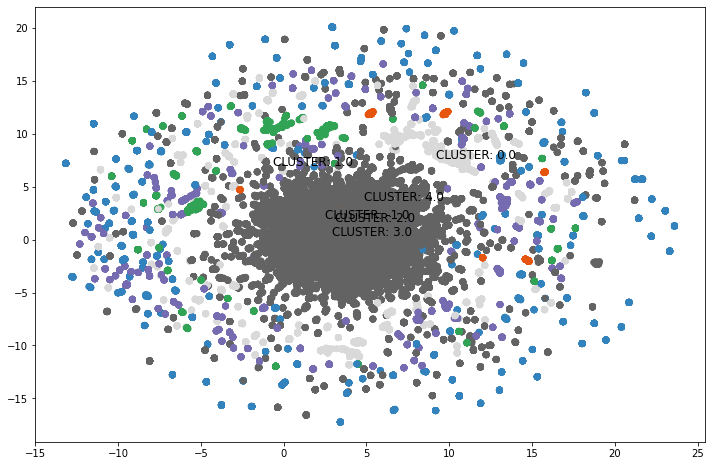

In [41]:
fig = plt.figure(figsize=(12,8))
plt.scatter(reducer.embedding_[:, 0], reducer.embedding_[:, 1], c=labels, cmap='tab20c')

viz_clusters = pd.DataFrame(embedding)
viz_clusters['cluster'] = labels

for row in viz_clusters.groupby('cluster').mean().reset_index().values:
    label = f'CLUSTER: {row[0]}'
    plt.annotate(label, (row[1], row[2]), textcoords="offset points", fontsize=12,  xytext=(25,0), ha='center')

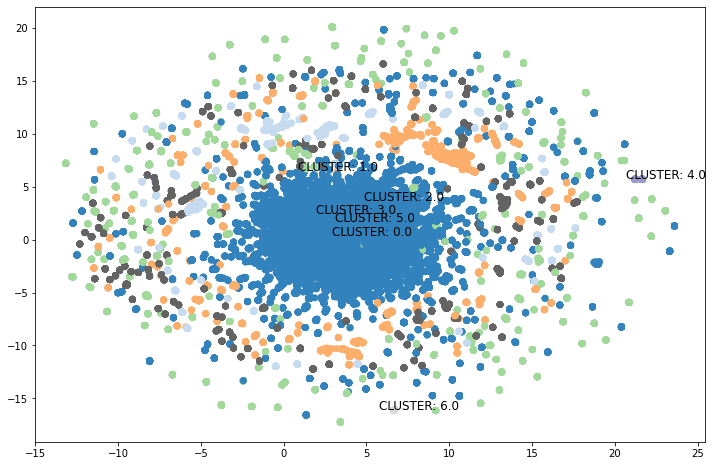

In [42]:
fig = plt.figure(figsize=(12,8))
plt.scatter(reducer.embedding_[:, 0], reducer.embedding_[:, 1], c=K_labels, cmap='tab20c')

viz_clusters = pd.DataFrame(embedding)
viz_clusters['cluster'] = K_labels

for row in viz_clusters.groupby('cluster').mean().reset_index().values:
    label = f'CLUSTER: {row[0]}'
    plt.annotate(label, (row[1], row[2]), textcoords="offset points", fontsize=12,  xytext=(25,0), ha='center')

In [43]:
from sklearn.metrics import silhouette_score

In [44]:
silhouette_score(X_reduced, labels)

0.7492535

In [45]:
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_score(X_reduced, labels)

38154.337908623704

In [46]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X_reduced, labels)

1.8654714943837372

In [47]:
silhouette_score(X_reduced, K_labels)

0.74164385

In [48]:
calinski_harabasz_score(X_reduced, K_labels)

39553.884933580804

In [49]:
davies_bouldin_score(X_reduced, K_labels)

1.489992220357897

### Hyperparameter 

In [50]:
from sklearn.metrics import silhouette_score
sil1 = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k, init='k-means++', max_iter=500, random_state=42).fit(X_reduced)
  labels = kmeans.labels_
  sil1.append(silhouette_score(X_reduced, labels, metric = 'cosine'))

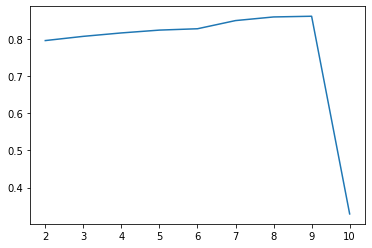

In [51]:
k1 = np.array([2,3,4,5,6,7,8,9,10]).T
k1 = k1.reshape(9,1)
plt.plot(k1, sil1)

In [69]:
k_means2 = KMeans(n_clusters = 9, init='k-means++', max_iter=500, random_state=42).fit(X_reduced)
klabels = k_means2.labels_

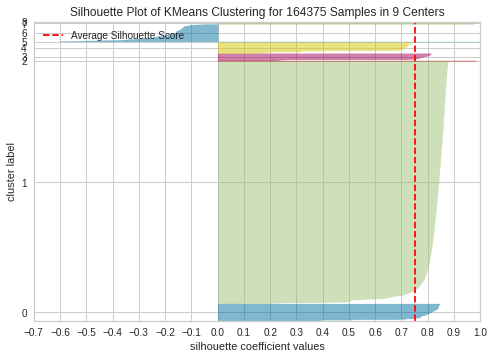

In [53]:
from yellowbrick.cluster import SilhouetteVisualizer
visualizer = SilhouetteVisualizer(k_means2, colors='yellowbrick')
visualizer.fit(X_reduced)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [70]:
silhouette_score(X_reduced, klabels, metric = 'cosine')

0.861536

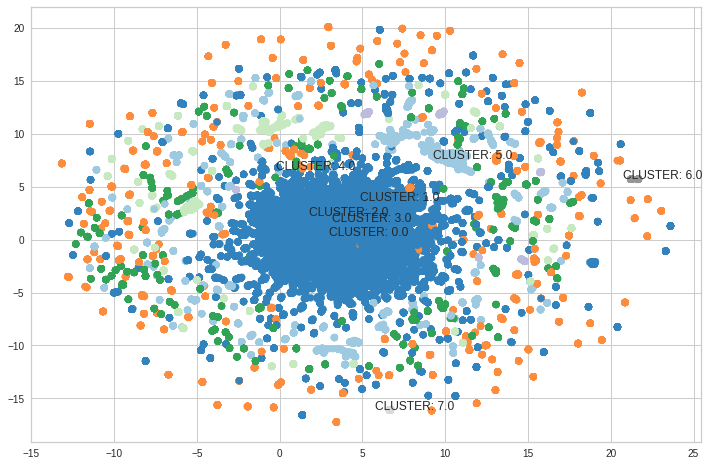

In [57]:
fig = plt.figure(figsize=(12,8))
plt.scatter(reducer.embedding_[:, 0], reducer.embedding_[:, 1], c=klabels, cmap='tab20c')

viz_clusters = pd.DataFrame(embedding)
viz_clusters['cluster'] = klabels

for row in viz_clusters.groupby('cluster').mean().reset_index().values:
    label = f'CLUSTER: {row[0]}'
    plt.annotate(label, (row[1], row[2]), textcoords="offset points", fontsize=12,  xytext=(25,0), ha='center')

In [58]:
import nltk; nltk.download('stopwords')
from nltk.probability import FreqDist

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [59]:
def tokenize_nltk(text):
    return nltk.tokenize.word_tokenize(text)

In [60]:
def get_most_frequent_words(text):
    word_list = tokenize_nltk(text)
    word_list = [word for word in word_list if word not in stopwords and word not in string.punctuation and re.search('[a-zA-Z]', word)]
    freq_dist = FreqDist(word_list)
    top_200 = freq_dist.most_common(200)
    top_200 = [word[0] for word in top_200]
    return top_200

In [61]:
from nltk.tokenize import wordpunct_tokenize
def print_most_common_words_by_cluster(all_training, km, num_clusters):
    clusters = km.labels_.tolist()
    docs = {'text': all_training, 'cluster': clusters}
    frame = pd.DataFrame(docs, index = [clusters])
    for cluster in range(0, num_clusters):
        this_cluster_text = \
        frame[frame['cluster'] == cluster]
        all_text = \
        " ".join(this_cluster_text['text'].astype(str))
        top_200 = get_most_frequent_words(all_text)
        print(cluster)
        print(top_200)
    return frame

In [65]:
data = df[['clean_text']].values.tolist()
from nltk.corpus import stopwords
stopwords = stopwords.words('english')


In [67]:
import string

In [71]:
nltk.download('punkt')
print_most_common_words_by_cluster(data, k_means2, 8)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
0
['AGE', 'D1', 'D2', '1410Rs', 'HOSPITAL', 'C1', 'Hospital', 'Free', 'P3', 'Dose', 'Rainbow', 'Clinic', 'CLINIC', '1200Rs', '1250Rs', 'S2', 'CRADLE', 'Age', 'Date', 'ASTER', 'ROAD', 'Road', 'Fortis', 'HEALTH', 'World', 'CARE', 'RAINBOW', '1260Rs', 'P', 'Royal', 'MallC1', 'Aster', 'Capacity', 'MEDICAL', 'School', '1350Rs', 'COLLEGE', 'M', 'FERTILITY', 'S', 'NU', '250Rs', 'J', 'AND', 'G', 'ESSENTIAL', '780Rs', 'Cradle', 'TH', 'RESEARCH', 'Motherhood', 'FORTIS', 'UNITED', 'SPECTRA', 'MOTHERHOOD', 'b', 'C', 'All', 'CENTER', '1000Rs', 'TENET', 'DIAGNOSTIC', 'Fertility', 'Y', 'So', 'SCHOOL', 'dose2', 'R', 'Layout', 'Sir', 'V', '1100Rs', 'Ward', 'Office', 'Red', 'Cross', 'Society', 'PEOPLE', 'TREE', 'DISTRICT', 'FUND', 'Top', 'Palace', 'Grama', 'Garden', 'Ye', 'NOR', 'NURSING', 'HOME', 'BLOCK', 'K', 'SUGAR', 'dose1', 'SITE', 'APPLE', 'UNIO', 'IMMACULATE', 'CHURCH', 'DIAGNOSTICS', 'M

,text,cluster
1,[Same said daikon paste could treat a storm],1
1,[While the world been on the wrong side of his...,1
1,[Covid 19 vaccine is to last 2 - 4 …],1
1,"[are immutable , Senator , even when you ' re ...",1
1,[Explain to me again why we need a vaccine …],1
...,...,...
1,[Why is soft on terror . 1 . Inability to take...,1
4,[45 + Availability for 04 / 08 at 08 : 30AM FR...,4
4,[45 + URBAN Availability for 04 / 08 at 08 : 3...,4
7,[18 - 44 Availability for 04 / 08 at 08 : 00AM...,7
